In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import math

pd.options.display.max_columns = 100

In [2]:
train_file_name = 'train_ver2.csv'
test_file_name = 'test_ver2.csv'

dir_path = './dataset/'

train_path = os.path.join(dir_path, train_file_name)
test_path = os.path.join(dir_path, test_file_name)

In [3]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

C:\kwon\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\kwon\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1  

In [5]:
def null_counter(df):
    df = df.copy()
    columns = ['Feature', 'Null_Counts']
    null_data = pd.DataFrame(df.isnull().sum().sort_values(ascending=False).reset_index())
    null_data.columns = columns
    null_data.set_index('Feature', inplace = True)
    return null_data

In [6]:
null_counter(train_df)

,Null_Counts
Feature,
conyuemp,13645501
ult_fec_cli_1t,13622516
renta,2794375
segmento,189368
canal_entrada,186126
tiprel_1mes,149781
indrel_1mes,149781
nomprov,93591
cod_prov,93591


In [7]:
train_df = train_df.drop(['conyuemp', 'ult_fec_cli_1t'], axis=1)

> #### Data set 에서 IND~ Feature 들은 종속변수이며 독립변수가 된다. 또한, 고객 번호마다 매월 기록한 데이터임

In [8]:
numeric_features = ['age', 'antiguedad', 'renta']
cat_features = [i for i in train_df.columns if i not in numeric_features + ['ncodpers']]

In [9]:
def cat_dist():
    for i in cat_features:
        sns.countplot(train_df[i])
        plt.show()

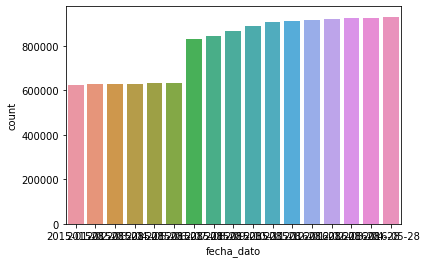

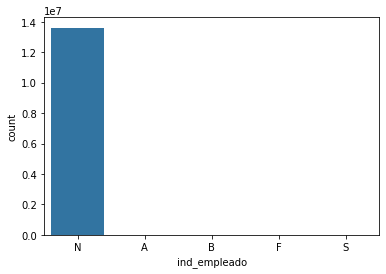

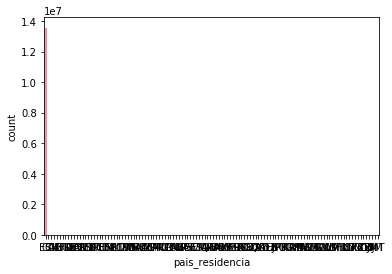

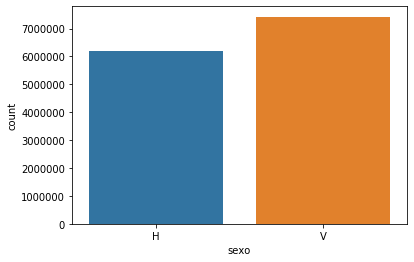

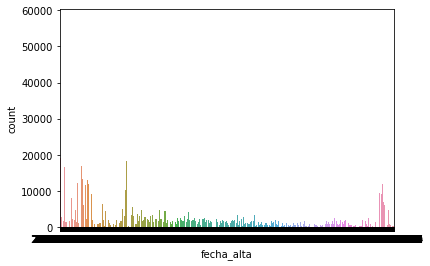

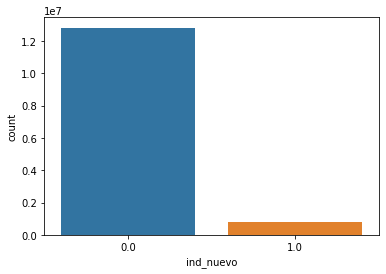

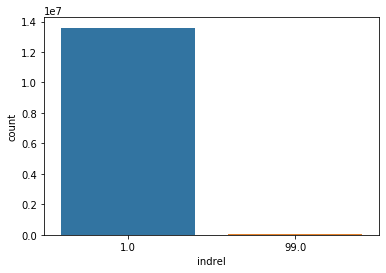

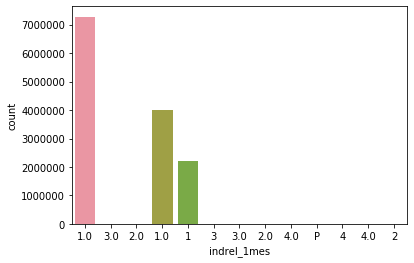

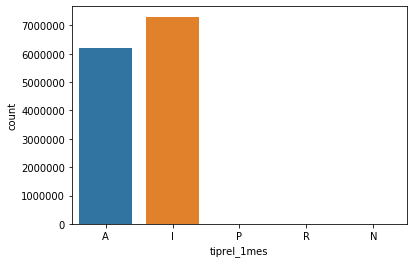

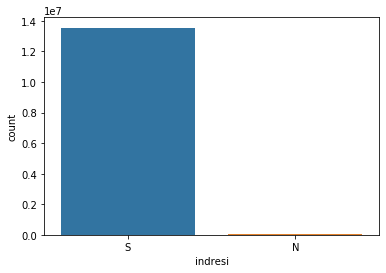

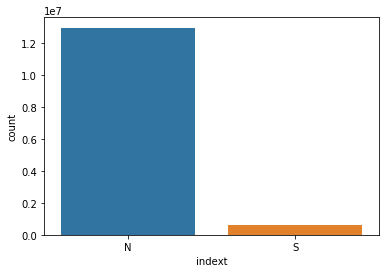

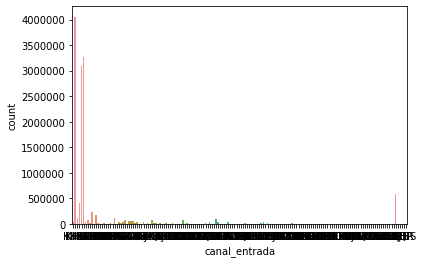

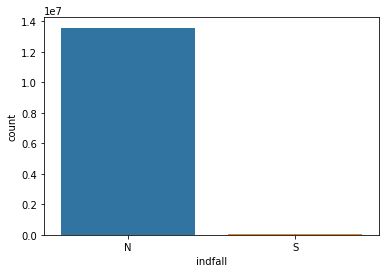

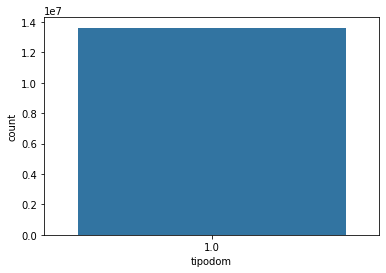

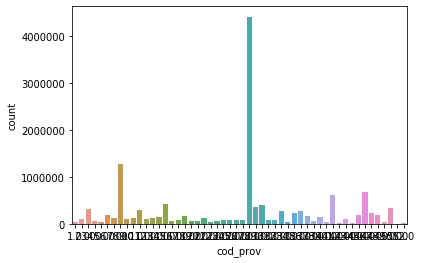

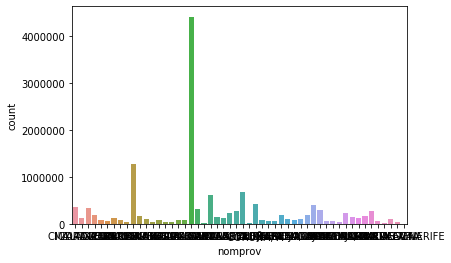

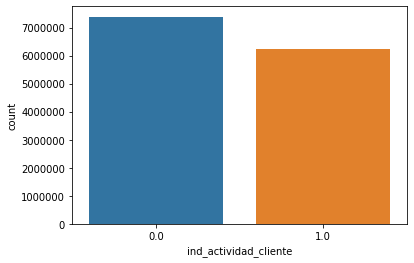

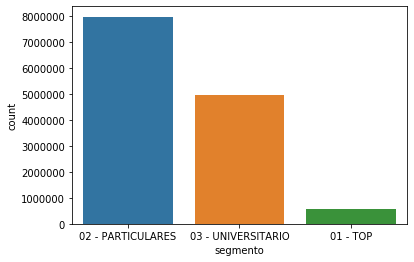

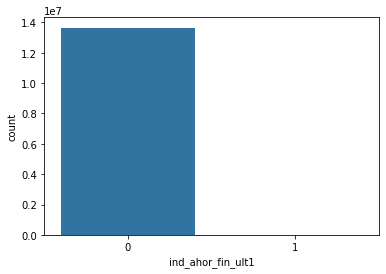

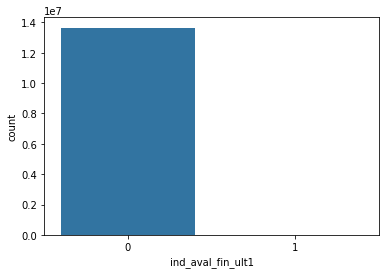

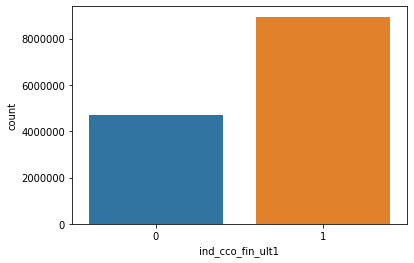

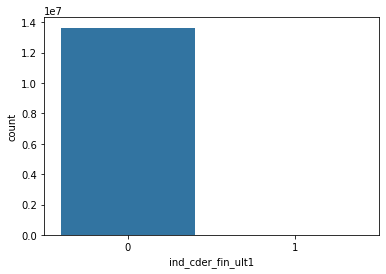

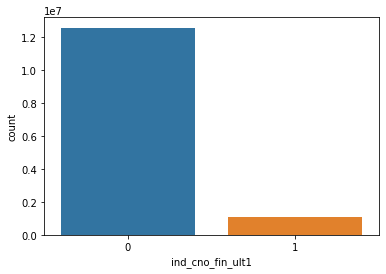

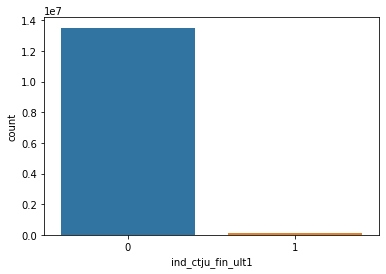

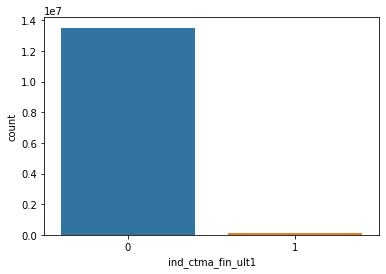

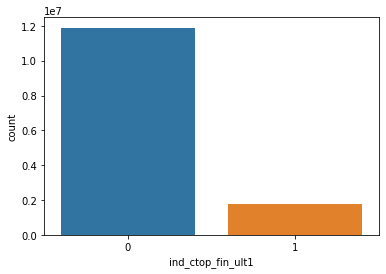

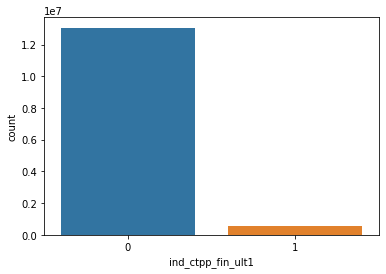

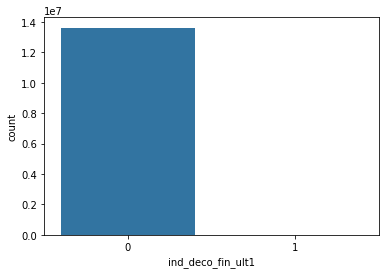

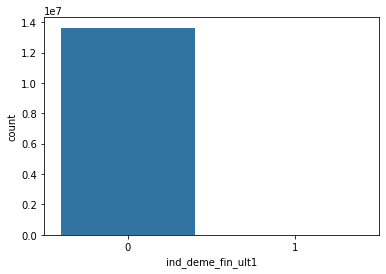

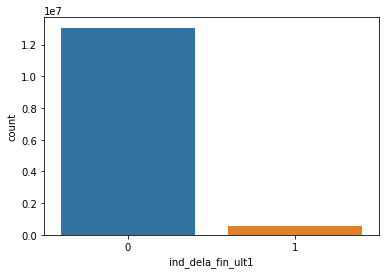

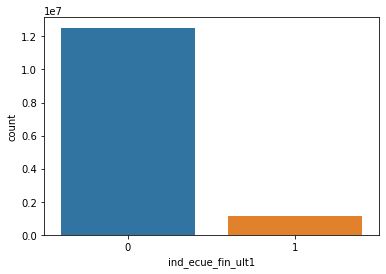

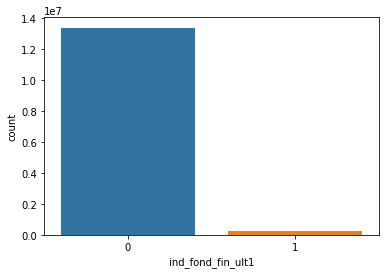

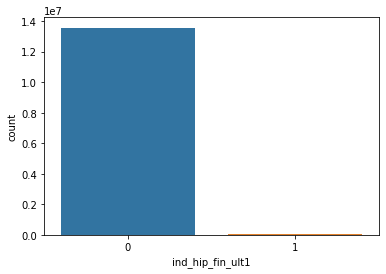

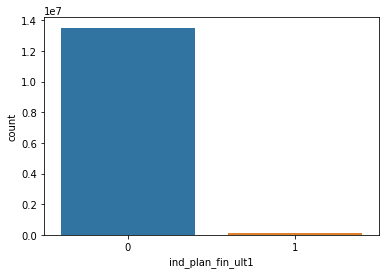

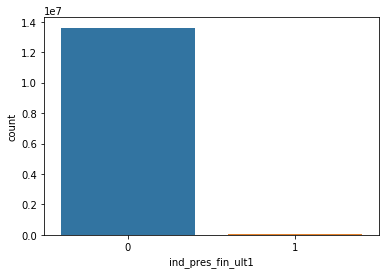

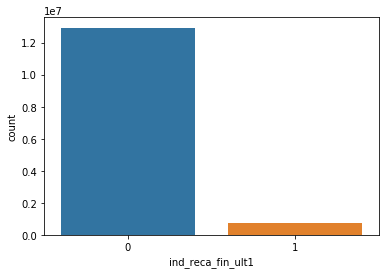

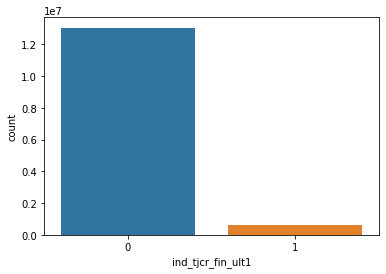

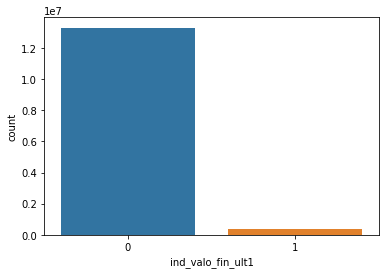

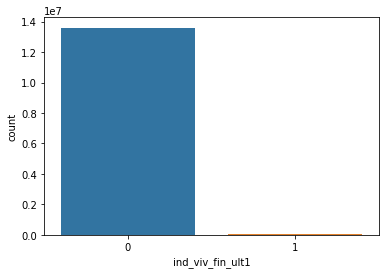

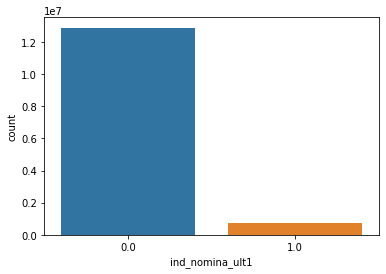

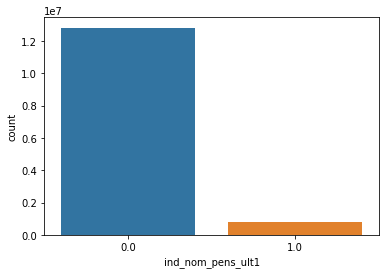

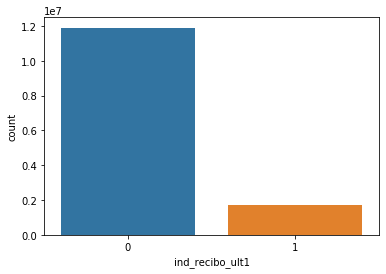

In [10]:
cat_dist()

In [11]:
train_df = train_df.drop(['ind_empleado', 'tipodom'], axis=1)

In [12]:
train_df['indrel_1mes'] = train_df['indrel_1mes'].replace('P', 5)

In [13]:
train_df['indrel_1mes'] = train_df['indrel_1mes'].\
map(lambda X: int(X) if ((type(X) == float) and (np.isnan(X) == False)) else (int(eval(X)) if type(X) == str else X)).value_counts()

In [14]:
train_df['indrel_1mes'] = pd.Categorical(train_df['indrel_1mes'])

In [15]:
train_df.tail()

,fecha_dato,ncodpers,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
13647304,2016-05-28,1166765,ES,V,22,2013-08-14,0.0,33,1.0,NaN,I,S,N,KHE,N,50.0,ZARAGOZA,0.0,43912.17,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,ES,V,23,2013-08-14,0.0,33,1.0,NaN,I,S,N,KHE,N,26.0,"RIOJA, LA",0.0,23334.99,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,ES,H,47,2013-08-14,0.0,33,1.0,NaN,A,S,N,KHE,N,50.0,ZARAGOZA,1.0,NaN,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,ES,H,22,2013-08-14,0.0,33,1.0,NaN,I,S,N,KHE,N,50.0,ZARAGOZA,0.0,199592.82,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13647308,2016-05-28,1550586,ES,H,37,2016-05-13,1.0,0,1.0,NaN,NaN,S,N,NaN,N,28.0,MADRID,1.0,NaN,NaN,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [16]:
month = train_df['fecha_dato'].unique().tolist()
target_cols = train_df.columns[24:].tolist()
label_over_time = []
for i in range(len(target_cols)):
    target_sum = train_df.groupby(['fecha_dato'])[target_cols[i]].agg('sum')
    label_over_time.append(target_sum.tolist())

label_sum_over_time = []
for i in range(len(target_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))

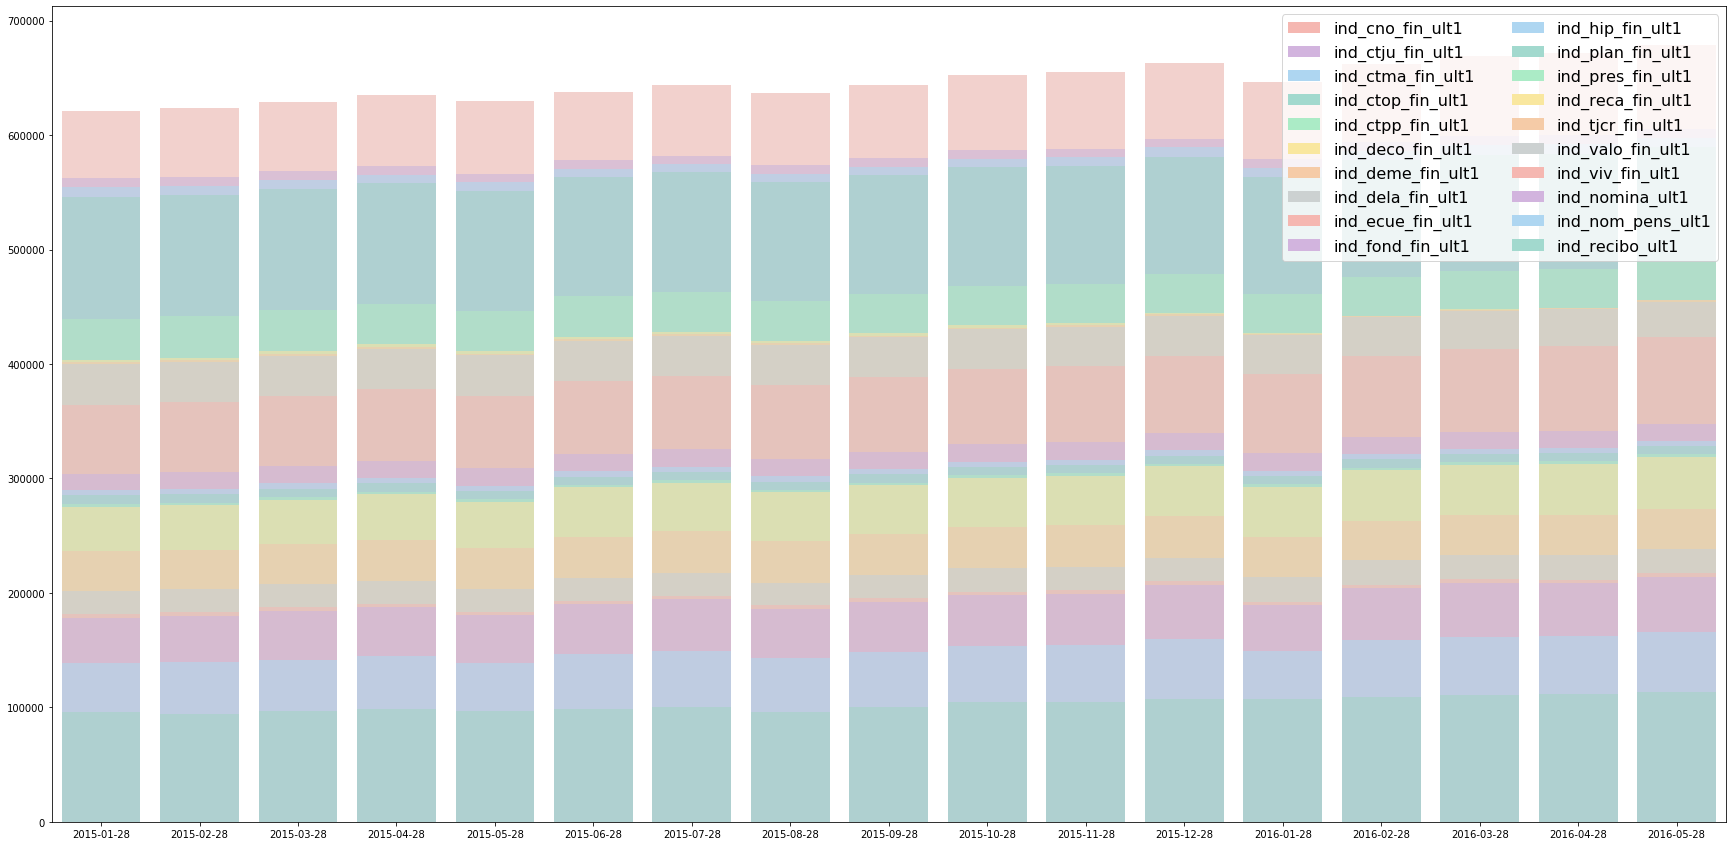

In [17]:
color_list = ['#F5B7b1', '#D2B4DE', '#AED6F1', '#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(target_cols)):
    sns.barplot(x=month, y=label_sum_over_time[i], color=color_list[i%8], alpha=0.7)
plt.legend([plt.Rectangle((0,0), 1,1,edgecolor='none', fc = color_list[i%8]) for i in range(len(target_cols))],\
           target_cols, loc=1, ncol=2,prop={'size':16})
plt.show()

In [18]:
def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")]
    int_date = (int(Y) - 2015) * 12 + int(M)
    return int_date

train_df['int_date'] = train_df['fecha_dato'].map(date_to_int).astype(np.int8)

train_df_lag = train_df.copy()
train_df_lag['int_date'] += 1
train_df_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in train_df.columns]

train = train_df.merge(train_df_lag, on=['ncodpers', 'int_date'], how='left')

del train_df, train_df_lag

for prod in target_cols:
    prev = prod + '_prev'
    train[prev].fillna(0, inplace=True)

for prod in target_cols:
    padd = prod + '_add'
    prev = prod + '_prev'
    train[padd] = ((train[prod] == 1) & train[prev] == 0).astype(np.int8)
    
add_cols = [prod + '_add' for prod in target_cols]
labels = train[add_cols].copy()
labels.columns = target_cols
labels.to_csv('./labels.csv', index=False)

In [23]:
# 훈련 데이터와 테스트 데이터를 하나의 데이터로 통합하는 코드이다.
def clean_data(fi, fo, header, suffix):
    
    # fi : 훈련/테스트 데이터를 읽어오는 file iterator
    # fo : 통합되는 데이터가 write되는 경로
    # header : 데이터에 header 줄을 추가할 것인지를 결정하는 boolean
    # suffix : 훈련 데이터에는 48개의 변수가 있고, 테스트 데이터에는 24개의 변수만 있다. suffix로 부족한 테스트 데이터 24개분을 공백으로 채운다.

    # csv의 첫줄, 즉 header를 읽어온다
    head = fi.readline().strip("\n").split(",")
    head = [h.strip('"') for h in head]

    # ‘nomprov’ 변수의 위치를 ip에 저장한다
    for i, h in enumerate(head):
        if h == "nomprov":
            ip = i

    # header가 True 일 경우에는, 저장할 파일의 header를 write한다
    if header:
        fo.write("%s\n" % ",".join(head))

    # n은 읽어온 변수의 개수를 의미한다 (훈련 데이터 : 48, 테스트 데이터 : 24)
    n = len(head)
    for line in fi:
        # 파일의 내용을 한줄 씩 읽어와서, 줄바꿈(\n)과 ‘,’으로 분리한다
        fields = line.strip("\n").split(",")

        # ‘nomprov’변수에 ‘,’을 포함하는 데이터가 존재한다. ‘,’으로 분리된 데이터를 다시 조합한다
        if len(fields) > n:
            prov = fields[ip] + fields[ip+1]
            del fields[ip]
            fields[ip] = prov

        # 데이터 개수가 n개와 동일한지 확인하고, 파일에 write한다. 테스트 데이터의 경우, suffix는24개의 공백이다
        assert len(fields) == n
        fields = [field.strip() for field in fields]
        fo.write("%s%s\n" % (",".join(fields), suffix))

# 하나의 데이터로 통합하는 코드를 실행한다. 먼저 훈련 데이터를 write하고, 그 다음으로 테스트 데이터를 write한다. 이제부터 하나의 dataframe만을 다루며 데이터 전처리를 진행한다.
with open("./8th.clean.all.csv", "w") as f:
    clean_data(open("./dataset/train_ver2.csv"), f, True, "")
    comma24 = "".join(["," for i in range(24)])
    clean_data(open("./dataset/test_ver2.csv"), f, False, comma24)


In [31]:
import numpy as np

def apk(actual, predicted, k=7, default=0.0):
    # MAP@7 이므로, 최대 7개만 사용한다
    if len(predicted) > k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predicted):
        # 점수를 부여하는 조건은 다음과 같다 :
        # 예측값이 정답에 있고 (‘p in actual’)
        # 예측값이 중복이 아니면 (‘p not in predicted[:i]’) 
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    # 정답값이 공백일 경우, 무조건 0.0점을 반환한다
    if not actual:
        return default

    # 정답의 개수(len(actual))로 average precision을 구한다
    return score / min(len(actual), k)

def mapk(actual, predicted, k=7, default=0.0):
    # list of list인 정답값(actual)과 예측값(predicted)에서 고객별 Average Precision을 구하고, np.mean()을 통해 평균을 계산한다
    return np.mean([apk(a, p, k, default) for a, p in zip(actual, predicted)]) 


In [32]:
import math
import time

import numpy as np

class Timer:
    def __init__(self, text=None):
        self.text = text

    def __enter__(self):
        self.cpu = time.clock()
        self.time = time.time()
        if self.text:
            print("{}...".format(self.text))
        return self

    def __exit__(self, *args):
        self.cpu = time.clock() - self.cpu
        self.time = time.time() - self.time
        if self.text:
            print("%s: cpu %0.2f, time %0.2f\n" % (self.text, self.cpu, self.time))

# 날짜 데이터를 월 단위 숫자로 변환하는 함수
def date_to_float(str_date):
    if str_date.__class__ is float and math.isnan(str_date) or str_date == "":
        return np.nan
    Y, M, D = [int(a) for a in str_date.strip().split("-")]
    float_date = float(Y) * 12 + float(M)
    return float_date

# 날짜 데이터를 월 단위 숫자로 변환하되 1~18 사이로 제한하는 함수
def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")] # "2016-05-28"
    int_date = (int(Y) - 2015) * 12 + int(M)
    assert 1 <= int_date <= 12 + 6
    return int_date


products = (
    "ind_ahor_fin_ult1",
    "ind_aval_fin_ult1",
    "ind_cco_fin_ult1" ,
    "ind_cder_fin_ult1",
    "ind_cno_fin_ult1" ,
    "ind_ctju_fin_ult1",
    "ind_ctma_fin_ult1",
    "ind_ctop_fin_ult1",
    "ind_ctpp_fin_ult1",
    "ind_deco_fin_ult1",
    "ind_deme_fin_ult1",
    "ind_dela_fin_ult1",
    "ind_ecue_fin_ult1",
    "ind_fond_fin_ult1",
    "ind_hip_fin_ult1" ,
    "ind_plan_fin_ult1",
    "ind_pres_fin_ult1",
    "ind_reca_fin_ult1",
    "ind_tjcr_fin_ult1",
    "ind_valo_fin_ult1",
    "ind_viv_fin_ult1" ,
    "ind_nomina_ult1"  ,
    "ind_nom_pens_ult1",
    "ind_recibo_ult1"  ,
)

dtypes = {
    "fecha_dato": str,
    "ncodpers": int,
    "conyuemp": str, # Spouse index. 1 if the customer is spouse of an employee
}


def apk(actual, predicted, k=10, default=1.0):
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return default

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10, default=1.0):
    return np.mean([apk(a,p,k,default) for a,p in zip(actual, predicted)])


In [34]:
import os
import pickle

import pandas as pd
import numpy as np

# xgboost, lightgbm 라이브러리
import xgboost as xgb
import lightgbm as lgbm

from utils import *

# XGBoost 모델을 학습하는 함수이다
def xgboost(XY_train, XY_validate, test_df, features, XY_all=None, restore=False):
    # 최적의 parameter를 지정한다
    param = {
        'objective': 'multi:softprob',
        'eta': 0.1,
        'min_child_weight': 10,
        'max_depth': 8,
        'silent': 1,
        # 'nthread': 16,
        'eval_metric': 'mlogloss',
        'colsample_bytree': 0.8,
        'colsample_bylevel': 0.9,
        'num_class': len(products),
    }

    if not restore:
        # 훈련 데이터에서 X, Y, weight를 추출한다. as_matrix를 통해 메모리 효율적으로 array만 저장한다
        X_train = XY_train.as_matrix(columns=features)
        Y_train = XY_train.as_matrix(columns=["y"])
        W_train = XY_train.as_matrix(columns=["weight"])
        # xgboost 전용 데이터형식으로 변환한다
        train = xgb.DMatrix(X_train, label=Y_train, feature_names=features, weight=W_train)

        # 검증 데이터에 대해서 동일한 작업을 진행한다
        X_validate = XY_validate.as_matrix(columns=features)
        Y_validate = XY_validate.as_matrix(columns=["y"])
        W_validate = XY_validate.as_matrix(columns=["weight"])
        validate = xgb.DMatrix(X_validate, label=Y_validate, feature_names=features, weight=W_validate)

        # XGBoost 모델을 학습한다. early_stop 조건은 20번이며, 최대 1000개의 트리를 학습한다
        evallist  = [(train,'train'), (validate,'eval')]
        model = xgb.train(param, train, 1000, evals=evallist, early_stopping_rounds=20)
        # 학습된 모델을 저장한다
        pickle.dump(model, open("next_multi.pickle", "wb"))
    else:
        # “2016-06-28” 테스트 데이터를 사용할 시에는, 사전에 학습된 모델을 불러온다
        model = pickle.load(open("next_multi.pickle", "rb"))
    # 교차 검증으로 최적의 트리 개수를 정한다
    best_ntree_limit = model.best_ntree_limit

    if XY_all is not None:
        # 전체 훈련 데이터에 대해서 X, Y, weight 를 추출하고, XGBoost 전용 데이터 형태로 변환한다
        X_all = XY_all.as_matrix(columns=features)
        Y_all = XY_all.as_matrix(columns=["y"])
        W_all = XY_all.as_matrix(columns=["weight"])
        all_data = xgb.DMatrix(X_all, label=Y_all, feature_names=features, weight=W_all)

        evallist  = [(all_data,'all_data')]
        # 학습할 트리 개수를 전체 훈련 데이터가 늘어난 만큼 조정한다
        best_ntree_limit = int(best_ntree_limit * (len(XY_train) + len(XY_validate)) / len(XY_train))
        # 모델 학습!
        model = xgb.train(param, all_data, best_ntree_limit, evals=evallist)

    # 변수 중요도를 출력한다. 학습된 XGBoost 모델에서 .get_fscore()를 통해 변수 중요도를 확인할 수 있다
    print("Feature importance:")
    for kv in sorted([(k,v) for k,v in model.get_fscore().items()], key=lambda kv: kv[1], reverse=True):
        print(kv)

    # 예측에 사용할 테스트 데이터를 XGBoost 전용 데이터로 변환한다. 이 때, weight는 모두 1이기에, 별도로 작업하지 않는다
    X_test = test_df.as_matrix(columns=features)
    test = xgb.DMatrix(X_test, feature_names=features)

    # 학습된 모델을 기반으로, best_ntree_limit개의 트리를 기반으로 예측한다
    return model.predict(test, ntree_limit=best_ntree_limit)


def lightgbm(XY_train, XY_validate, test_df, features, XY_all=None, restore=False):
    # 훈련 데이터, 검증 데이터 X, Y, weight 추출 후, LightGBM 전용 데이터로 변환한다
    train = lgbm.Dataset(XY_train[list(features)], label=XY_train["y"], weight=XY_train["weight"], feature_name=features)
    validate = lgbm.Dataset(XY_validate[list(features)], label=XY_validate["y"], weight=XY_validate["weight"], feature_name=features, reference=train)

    # 다양한 실험을 통해 얻은 최적의 학습 parameter
    params = {
        'task' : 'train',
        'boosting_type' : 'gbdt',
        'objective' : 'multiclass',
        'num_class': 24,
        'metric' : {'multi_logloss'},
        'is_training_metric': True,
        'max_bin': 255,
        'num_leaves' : 64,
        'learning_rate' : 0.1,
        'feature_fraction' : 0.8,
        'min_data_in_leaf': 10,
        'min_sum_hessian_in_leaf': 5,
        # 'num_threads': 16,
    }

    if not restore:
        # XGBoost와 동일하게 훈련/검증 데이터를 기반으로 최적의 트리 개수를 계산한다
        model = lgbm.train(params, train, num_boost_round=1000, valid_sets=validate, early_stopping_rounds=20)
        best_iteration = model.best_iteration
        # 학습된 모델과 최적의 트리 개수 정보를 저장한다
        model.save_model("tmp/lgbm.model.txt")
        pickle.dump(best_iteration, open("tmp/lgbm.model.meta", "wb"))
    else:
        model = lgbm.Booster(model_file="tmp/lgbm.model.txt")
        best_iteration = pickle.load(open("tmp/lgbm.model.meta", "rb"))

    if XY_all is not None:
        # 전체 훈련 데이터에는 늘어난 양만큼 트리 개수를 늘린다
        best_iteration = int(best_iteration * len(XY_all) / len(XY_train))
        # 전체 훈련 데이터에 대한 LightGBM 전용 데이터를 생성한다
        all_train = lgbm.Dataset(XY_all[list(features)], label=XY_all["y"], weight=XY_all["weight"], feature_name=features)
        # LightGBM 모델 학습!
        model = lgbm.train(params, all_train, num_boost_round=best_iteration)
        model.save_model("tmp/lgbm.all.model.txt")

    # LightGBM 모델이 제공하는 변수 중요도 기능을 통해 변수 중요도를 출력한다
    print("Feature importance by split:")
    for kv in sorted([(k,v) for k,v in zip(features, model.feature_importance("split"))], key=lambda kv: kv[1], reverse=True):
        print(kv)
    print("Feature importance by gain:")
    for kv in sorted([(k,v) for k,v in zip(features, model.feature_importance("gain"))], key=lambda kv: kv[1], reverse=True):
        print(kv)

    # 테스트 데이터에 대한 예측 결과물을 return한다
    return model.predict(test_df[list(features)], num_iteration=best_iteration)


In [35]:
import math    
import io    

# 파일 압축 용도
import gzip    
import pickle    
import zlib    

# 데이터, 배열을 다루기 위한 기본 라이브러리
import pandas as pd 
import numpy as np

# 범주형 데이터를 수치형으로 변환하기 위한 전처리 도구
from sklearn.preprocessing import LabelEncoder

import engines
from utils import *

np.random.seed(2016)
transformers = {}

def assert_uniq(series, name):
    uniq = np.unique(series, return_counts=True)
    print("assert_uniq", name, uniq)

def custom_one_hot(df, features, name, names, dtype=np.int8, check=False):
    for n, val in names.items():
        # 신규 변수명을 “변수명_숫자”로 지정한다
        new_name = "%s_%s" % (name, n)
        # 기존 변수에서 해당 고유값을 가지면 1, 그 외는 0인 이진 변수를 생성한다
        df[new_name] = df[name].map(lambda x: 1 if x == val else 0).astype(dtype)
        features.append(new_name)

def label_encode(df, features, name):
    # 데이터 프레임 df의 변수 name의 값을 모두 string으로 변환한다
    df[name] = df[name].astype('str')
    # 이미, label_encode 했던 변수일 경우, transformer[name]에 있는 LabelEncoder()를 재활용한다
    if name in transformers:
        df[name] = transformers[name].transform(df[name])
    # 처음 보는 변수일 경우, transformer에 LabelEncoder()를 저장하고, .fit_transform() 함수로 label encoding을 수행한다
    else: # train
        transformers[name] = LabelEncoder()
        df[name] = transformers[name].fit_transform(df[name])
    # label encoding한 변수는 features 리스트에 추가한다
    features.append(name)

def encode_top(s, count=100, dtype=np.int8):
    # 모든 고유값에 대한 빈도를 계산한다
    uniqs, freqs = np.unique(s, return_counts=True)
    # 빈도 Top 100을 추출한다
    top = sorted(zip(uniqs,freqs), key=lambda vk: vk[1], reverse = True)[:count]
    # { 기존 데이터 : 순위 } 를 나타내는 dict()를 생성한다
    top_map = {uf[0]: l+1 for uf, l in zip(top, range(len(top)))}
    # 고빈도 100개의 데이터는 순위로 대체하고, 그 외는 0으로 대체한다
    return s.map(lambda x: top_map.get(x, 0)).astype(dtype)

def apply_transforms(train_df):
    # 학습에 사용할 변수를 저장할 features 리스트를 생성한다
    features = []

    # 두 변수를 label_encode() 한다
    label_encode(train_df, features, "canal_entrada")
    label_encode(train_df, features, "pais_residencia")

    # age의 결측값을 0.0으로 대체하고, 모든 값을 정수로 변환한다.
    train_df["age"] = train_df["age"].fillna(0.0).astype(np.int16)
    features.append("age")

    # renta의 결측값을 1.0으로 대체하고, log를 씌워 분포를 변형한다
    train_df["renta"].fillna(1.0, inplace=True)
    train_df["renta"] = train_df["renta"].map(math.log)
    features.append("renta")

    # 고빈도 100개의 순위를 추출한다
    train_df["renta_top"] = encode_top(train_df["renta"])
    features.append("renta_top")

    # 결측값 혹은 음수를 0으로 대체하고, 나머지 값은 +1.0 은 한 후에, 정수로 변환한다
    train_df["antiguedad"] = train_df["antiguedad"].map(lambda x: 0.0 if x < 0 or math.isnan(x) else x+1.0).astype(np.int16)
    features.append("antiguedad")

    # 결측값을 0.0으로 대체하고, 정수로 변환한다
    train_df["tipodom"] = train_df["tipodom"].fillna(0.0).astype(np.int8)
    features.append("tipodom")
    train_df["cod_prov"] = train_df["cod_prov"].fillna(0.0).astype(np.int8)
    features.append("cod_prov")

    # fecha_dato에서 월/년도를 추출하여 정수값으로 변환한다
    train_df["fecha_dato_month"] = train_df["fecha_dato"].map(lambda x: int(x.split("-")[1])).astype(np.int8)
    features.append("fecha_dato_month")
    train_df["fecha_dato_year"] = train_df["fecha_dato"].map(lambda x: float(x.split("-")[0])).astype(np.int16)
    features.append("fecha_dato_year")

    # 결측값을 0.0으로 대체하고, fecha_alta에서 월/년도를 추출하여 정수값으로 변환한다
    # x.__class__는 결측값일 경우 float를 반환하기 때문에, 결측값 탐지용으로 사용하고 있다
    train_df["fecha_alta_month"] = train_df["fecha_alta"].map(lambda x: 0.0 if x.__class__ is float else float(x.split("-")[1])).astype(np.int8)
    features.append("fecha_alta_month")
    train_df["fecha_alta_year"] = train_df["fecha_alta"].map(lambda x: 0.0 if x.__class__ is float else float(x.split("-")[0])).astype(np.int16)
    features.append("fecha_alta_year")

    # 날짜 데이터를 월 기준 수치형 변수로 변환한다
    train_df["fecha_dato_float"] = train_df["fecha_dato"].map(date_to_float)
    train_df["fecha_alta_float"] = train_df["fecha_alta"].map(date_to_float)

    # fecha_dato 와 fecha_alto의 월 기준 수치형 변수의 차이값을 파생 변수로 생성한다
    train_df["dato_minus_alta"] = train_df["fecha_dato_float"] - train_df["fecha_alta_float"]
    features.append("dato_minus_alta")

    # 날짜 데이터를 월 기준 수치형 변수로 변환한다 (1 ~ 18 사이 값으로 제한)
    train_df["int_date"] = train_df["fecha_dato"].map(date_to_int).astype(np.int8)

    # 자체 개발한 one-hot-encoding을 수행한다
    custom_one_hot(train_df, features, "indresi", {"n":"N"})
    custom_one_hot(train_df, features, "indext", {"s":"S"})
    custom_one_hot(train_df, features, "conyuemp", {"n":"N"})
    custom_one_hot(train_df, features, "sexo", {"h":"H", "v":"V"})
    custom_one_hot(train_df, features, "ind_empleado", {"a":"A", "b":"B", "f":"F", "n":"N"})
    custom_one_hot(train_df, features, "ind_nuevo", {"new":1})
    custom_one_hot(train_df, features, "segmento", {"top":"01 - TOP", "particulares":"02 - PARTICULARES", "universitario":"03 - UNIVERSITARIO"})
    custom_one_hot(train_df, features, "indfall", {"s":"S"})
    custom_one_hot(train_df, features, "tiprel_1mes", {"a":"A", "i":"I", "p":"P", "r":"R"}, check=True)
    custom_one_hot(train_df, features, "indrel", {"1":1, "99":99})

    # 결측값을 0.0으로 대체하고, 그 외는 +1.0을 더하고, 정수로 변환한다
    train_df["ind_actividad_cliente"] = train_df["ind_actividad_cliente"].map(lambda x: 0.0 if math.isnan(x) else x+1.0).astype(np.int8)
    features.append("ind_actividad_cliente")

    # 결측값을 0.0으로 대체하고, “P”를 5로 대체하고, 정수로 변환한다
    train_df["indrel_1mes"] = train_df["indrel_1mes"].map(lambda x: 5.0 if x == "P" else x).astype(float).fillna(0.0).astype(np.int8)
    features.append("indrel_1mes")
    
    # 데이터 전처리/피쳐 엔지니어링이 1차적으로 완료된 데이터 프레임 train_df와 학습에 사용할 변수 리스트 features를 tuple 형태로 반환한다
    return train_df, tuple(features)


def make_prev_df(train_df, step):
    # 새로운 데이터 프레임에 ncodpers를 추가하고, int_date를 step만큼 이동시킨 값을 넣는다
    prev_df = pd.DataFrame()
    prev_df["ncodpers"] = train_df["ncodpers"]
    prev_df["int_date"] = train_df["int_date"].map(lambda x: x+step).astype(np.int8)

    # “변수명_prev1” 형태의 lag 변수를 생성한다
    prod_features = ["%s_prev%s" % (prod, step) for prod in products]
    for prod, prev in zip(products, prod_features):
        prev_df[prev] = train_df[prod]

    return prev_df, tuple(prod_features)


def load_data():
    # “데이터 준비”에서 통합한 데이터를 읽어온다
    fname = "./8th.clean.all.csv"
    train_df = pd.read_csv(fname, dtype=dtypes)

    # products는 util.py에서 정의한 24개의 금융 제품이름이다
    # 결측값을 0.0으로 대체하고, 정수형으로 변환한다
    for prod in products:
        train_df[prod] = train_df[prod].fillna(0.0).astype(np.int8)

    # 48개의 변수마다 전처리/피처 엔지니어링을 적용한다
    train_df, features = apply_transforms(train_df)

    prev_dfs = []
    prod_features = None

    use_features = frozenset([1,2])
    # 1 ~ 5까지의 step에 대하여 make_prev_df()를 통해 lag-n 데이터를 생성한다
    for step in range(1,6):
        prev1_train_df, prod1_features = make_prev_df(train_df, step)
        # 생성한 lag 데이터는 prev_dfs 리스트에 저장한다
        prev_dfs.append(prev1_train_df)
        # features에는 lag-1,2만 추가한다
        if step in use_features:
            features += prod1_features
        # prod_features에는 lag-1의 변수명만 저장한다
        if step == 1:
            prod_features = prod1_features

    return train_df, prev_dfs, features, prod_features


def join_with_prev(df, prev_df, how):
    # pandas merge 함수를 통해 join
    df = df.merge(prev_df, on=["ncodpers", "int_date"], how=how)
    # 24개 금융 변수를 소수형으로 변환한다
    for f in set(prev_df.columns.values.tolist()) - set(["ncodpers", "int_date"]):
        df[f] = df[f].astype(np.float16)
    return df

def make_data():
    train_df, prev_dfs, features, prod_features = load_data()

    for i, prev_df in enumerate(prev_dfs):
        with Timer("join train with prev%s" % (i+1)):
            how = "inner" if i == 0 else "left"
            train_df = join_with_prev(train_df, prev_df, how=how)

    # 24개의 금융 변수에 대해서 for loop을 돈다
    for prod in products:
        # [1~3], [1~5], [2~5] 의 3개 구간에 대해서 표준편차를 구한다
        for begin, end in [(1,3),(1,5),(2,5)]:
            prods = ["%s_prev%s" % (prod, i) for i in range(begin,end+1)]
            mp_df = train_df.as_matrix(columns=prods)
            stdf = "%s_std_%s_%s" % (prod,begin,end)

            # np.nanstd로 표준편차를 구하고, features에 신규 파생 변수 이름을 추가한다
            train_df[stdf] = np.nanstd(mp_df, axis=1)
            features += (stdf,)

        # [2~3], [2~5] 의 2개 구간에 대해서 최소값/최대값을 구한다
        for begin, end in [(2,3),(2,5)]:
            prods = ["%s_prev%s" % (prod, i) for i in range(begin,end+1)]
            mp_df = train_df.as_matrix(columns=prods)

            minf = "%s_min_%s_%s"%(prod,begin,end)
            train_df[minf] = np.nanmin(mp_df, axis=1).astype(np.int8)

            maxf = "%s_max_%s_%s"%(prod,begin,end)
            train_df[maxf] = np.nanmax(mp_df, axis=1).astype(np.int8)

            features += (minf,maxf,)

    # 고객 고유 식별 번호(ncodpers), 정수로 표현한 날짜(int_date), 실제 날짜(fecha_dato), 24개의 금융 변수(products)와 학습에 사용하기 위해 전처리/피쳐 엔지니어링한 변수(features)가 주요 변수이다.
    leave_columns = ["ncodpers", "int_date", "fecha_dato"] + list(products) + list(features)
    # 중복값이 없는지 확인한다
    assert len(leave_columns) == len(set(leave_columns))
    # train_df에서 주요 변수만을 추출한다
    train_df = train_df[leave_columns]

    return train_df, features, prod_features


def make_submission(f, Y_test, C):
    Y_ret = []
    # 파일의 첫 줄에 header를 쓴다
    f.write("ncodpers,added_products\n".encode('utf-8'))
    # 고객 식별 번호(C)와, 예측 결과물(Y_test)의 for loop
    for c, y_test in zip(C, Y_test):
        # (확률값, 금융 변수명, 금융 변수 id)의 tuple을 구한다
        y_prods = [(y,p,ip) for y,p,ip in zip(y_test, products, range(len(products)))]
        # 확률값을 기준으로 상위 7개 결과만 추출한다
        y_prods = sorted(y_prods, key=lambda a: a[0], reverse=True)[:7]
        # 금융 변수 id를 Y_ret에 저장한다
        Y_ret.append([ip for y,p,ip in y_prods])
        y_prods = [p for y,p,ip in y_prods]
        # 파일에 “고객 식별 번호, 7개의 금융 변수”를 쓴다
        f.write(("%s,%s\n" % (int(c), " ".join(y_prods))).encode('utf-8'))
    # 상위 7개 예측값을 반환한다
    return Y_ret


def train_predict(all_df, features, prod_features, str_date, cv):
    # all_df : 통합 데이터
    # features : 학습에 사용할 변수
    # prod_features : 24개 금융 변수
    # str_date : 예측 결과물을 산출하는 날짜. 2016-05-28일 경우, 훈련 데이터의 일부이며 정답을 알고 있기에 교차 검증을 의미하고, 2016-06-28일 경우, 캐글에 업로드하기 위한 테스트 데이터 예측 결과물을 생성한다
    # cv : 교차 검증 실행 여부

    # str_date로 예측 결과물을 산출하는 날짜를 지정한다
    test_date = date_to_int(str_date)
    # 훈련 데이터는 test_date 이전의 모든 데이터를 사용한다
    train_df = all_df[all_df.int_date < test_date]
    # 테스트 데이터를 통합 데이터에서 분리한다
    test_df = pd.DataFrame(all_df[all_df.int_date == test_date])

    # 신규 구매 고객만을 훈련 데이터로 추출한다
    X = []
    Y = []
    for i, prod in enumerate(products):
        prev = prod + "_prev1"
        # 신규 구매 고객을 prX에 저장한다
        prX = train_df[(train_df[prod] == 1) & (train_df[prev] == 0)]
        # prY에는 신규 구매에 대한 label 값을 저장한다
        prY = np.zeros(prX.shape[0], dtype=np.int8) + i
        X.append(prX)
        Y.append(prY)

    XY = pd.concat(X)
    Y = np.hstack(Y)
    # XY는 신규 구매 데이터만 포함한다
    XY["y"] = Y

    # 메모리에서 변수 삭제
    del train_df
    del all_df

    # 데이터별 가중치를 계산하기 위해서 새로운 변수 (ncodpers + fecha_dato)를 생성한다
    XY["ncodepers_fecha_dato"] = XY["ncodpers"].astype(str) + XY["fecha_dato"]
    uniqs, counts = np.unique(XY["ncodepers_fecha_dato"], return_counts=True)
    # 자연 상수(e)를 통해서, count가 높은 데이터에 낮은 가중치를 준다
    weights = np.exp(1/counts - 1)

    # 가중치를 XY 데이터에 추가한다
    wdf = pd.DataFrame()
    wdf["ncodepers_fecha_dato"] = uniqs
    wdf["counts"] = counts
    wdf["weight"] = weights
    XY = XY.merge(wdf, on="ncodepers_fecha_dato")

    # 교차 검증을 위하여 XY를 훈련:검증 (8:2)로 분리한다
    mask = np.random.rand(len(XY)) < 0.8
    XY_train = XY[mask]
    XY_validate = XY[~mask]

    # 테스트 데이터에서 가중치는 모두 1이다
    test_df["weight"] = np.ones(len(test_df), dtype=np.int8)

    # 테스트 데이터에서 “신규 구매” 정답값을 추출한다. 
    test_df["y"] = test_df["ncodpers"]
    Y_prev = test_df.as_matrix(columns=prod_features)
    for prod in products:
        prev = prod + "_prev1"
        padd = prod + "_add"
        # 신규 구매 여부를 구한다
        test_df[padd] = test_df[prod] - test_df[prev]

    test_add_mat = test_df.as_matrix(columns=[prod + "_add" for prod in products])
    C = test_df.as_matrix(columns=["ncodpers"])
    test_add_list = [list() for i in range(len(C))]
    # 평가 척도 MAP@7 계산을 위하여, 고객별 신규 구매 정답값을 test_add_list에 기록한다
    count = 0
    for c in range(len(C)):
        for p in range(len(products)):
            if test_add_mat[c,p] > 0:
                test_add_list[c].append(p)
                count += 1
    
    # 교차 검증에서, 테스트 데이터로 분리된 데이터가 얻을 수 있는 최대 MAP@7 값을 계산한다. 
    if cv:
        max_map7 = mapk(test_add_list, test_add_list, 7, 0.0)
        map7coef = float(len(test_add_list)) / float(sum([int(bool(a)) for a in test_add_list]))
        print("Max MAP@7", str_date, max_map7, max_map7*map7coef)

    # LightGBM 모델 학습 후, 예측 결과물을 저장한다
    Y_test_lgbm = engines.lightgbm(XY_train, XY_validate, test_df, features, XY_all = XY, restore = (str_date == "2016-06-28"))
    test_add_list_lightgbm = make_submission(io.BytesIO() if cv else gzip.open("tmp/%s.lightgbm.csv.gz" % str_date, "wb"), Y_test_lgbm - Y_prev, C)

    # 교차 검증일 경우, LightGBM 모델의 테스트 데이터 MAP@7 평가 척도를 출력한다
    if cv:
        map7lightgbm = mapk(test_add_list, test_add_list_lightgbm, 7, 0.0)
        print("LightGBMlib MAP@7", str_date, map7lightgbm, map7lightgbm*map7coef)

    # XGBoost 모델 학습 후, 예측 결과물을 저장한다
    Y_test_xgb = engines.xgboost(XY_train, XY_validate, test_df, features, XY_all = XY, restore = (str_date == "2016-06-28"))
    test_add_list_xgboost = make_submission(io.BytesIO() if cv else gzip.open("tmp/%s.xgboost.csv.gz" % str_date, "wb"), Y_test_xgb - Y_prev, C)

    # 교차 검증일 경우, XGBoost 모델의 테스트 데이터 MAP@7 평가 척도를 출력한다
    if cv:
        map7xgboost = mapk(test_add_list, test_add_list_xgboost, 7, 0.0)
        print("XGBoost MAP@7", str_date, map7xgboost, map7xgboost*map7coef)

    # 곱셈 후, 제곱근을 구하는 방식으로 앙상블을 수행한다
    Y_test = np.sqrt(np.multiply(Y_test_xgb, Y_test_lgbm))
    # 앙상블 결과물을 저장하고, 테스트 데이터에 대한 MAP@7 를 출력한다
    test_add_list_xl = make_submission(io.BytesIO() if cv else gzip.open("tmp/%s.xgboost-lightgbm.csv.gz" % str_date, "wb"), Y_test - Y_prev, C)

    # 정답값인 test_add_list와 앙상블 모델의 예측값을 mapk 함수에 넣어, 평가 척도 점수를 확인한다
    if cv:
        map7xl = mapk(test_add_list, test_add_list_xl, 7, 0.0)
        print("XGBoost+LightGBM MAP@7", str_date, map7xl, map7xl*map7coef)




if __name__ == "__main__":
    all_df, features, prod_features = make_data()
    
    # 피쳐 엔지니어링이 완료된 데이터를 저장한다
    train_df.to_pickle("./8th.feature_engineer.all.pkl")
    pickle.dump((features, prod_features), open("./8th.feature_engineer.cv_meta.pkl", "wb"))

    train_predict(all_df, features, prod_features, "2016-05-28", cv=True)
    train_predict(all_df, features, prod_features, "2016-06-28", cv=False)


C:\kwon\lib\site-packages\IPython\core\interactiveshell.py:3325: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


join train with prev1...
join train with prev1: cpu 35.70, time 35.70

join train with prev2...
join train with prev2: cpu 34.71, time 34.72

join train with prev3...
join train with prev3: cpu 37.67, time 37.67

join train with prev4...
join train with prev4: cpu 40.18, time 40.18

join train with prev5...
join train with prev5: cpu 42.79, time 42.79



C:\kwon\lib\site-packages\ipykernel_launcher.py:203: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\kwon\lib\site-packages\numpy\lib\nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
C:\kwon\lib\site-packages\ipykernel_launcher.py:213: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\kwon\lib\site-packages\ipykernel_launcher.py:216: RuntimeWarning: All-NaN slice encountered
C:\kwon\lib\site-packages\ipykernel_launcher.py:219: RuntimeWarning: All-NaN slice encountered


KeyboardInterrupt: 